Аннотация к датасету.

# **Оптимизация конверсии продаж**

**Данные, используемые в этом проекте, взяты из рекламной кампании анонимной организации в социальных сетях.**

1) ad_id: уникальный идентификатор для каждого объявления.

2) xyzcampaignid: идентификатор, связанный с каждой рекламной кампанией компании XYZ.

3) fbcampaignid: идентификатор, связанный с тем, как Facebook отслеживает каждую кампанию.

4) age: возраст человека, которому показывается реклама.

5) gender: пол человека, которому показано объявление

6) interest: код, указывающий категорию, к которой относится интерес человека (интересы указаны в общедоступном профиле человека на Facebook).

7) Impressions: сколько раз было показано объявление.

8) Clicks: количество кликов по этому объявлению.

9) Spent: сумма, уплаченная компанией xyz Facebook за показ этой рекламы.

10) Total_Conversion: общее количество людей, которые интересовались продуктом после просмотра рекламы.

11) Approved_Conversion: общее количество людей, купивших продукт после просмотра рекламы.

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Считываем набор данных с помощью pandas (функция read_csv)

In [ ]:
df = pd.read_csv('KAG_conversion_data.csv')

Смотрим на содержимое набора данных (датафрейм как таблица данных с признаками)

In [ ]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


Выводим общую информацию о признаках в датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Из результата выше видно, что имеются две категориальные и 9 числовых переменных, пропусков значений (таких как None или NaN) не имеется

Однако, следует отметить, что такие столбцы как xyz_campaign_id и fb_campaign_id тоже являются категориальными признаками, так как содержат повторения

С помощью функции describe() выводим некоторые статистические данные, такие как процентиль, среднее значение и стандартное отклонение различных числовых признаков

In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


**Распределение данных**

По рекламной реализации каждой компании XYZ

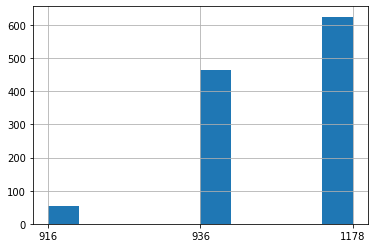

In [ ]:
df["xyz_campaign_id"] = df["xyz_campaign_id"].astype(str)
df["xyz_campaign_id"].hist()

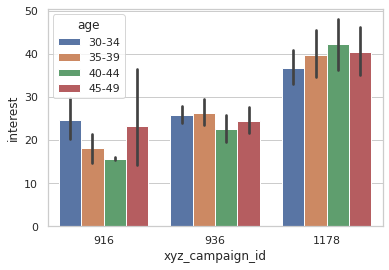

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=df["xyz_campaign_id"], y=df["interest"], hue=df["age"], data=df)

**По возрастной категории**

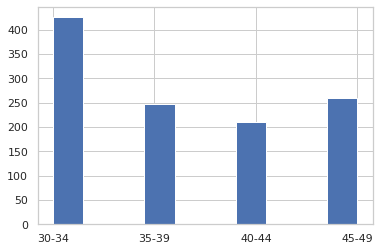

In [ ]:
df["age"].hist()

**По полу**

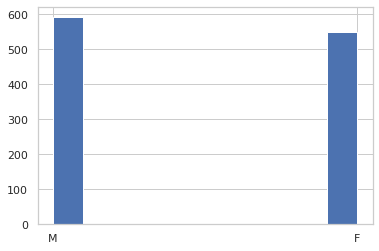

In [ ]:
df["gender"].hist()

Для расчета мер центральной тенденции рассчитаем среднее значение (mean), медиану и моду

**Среднее значение**

In [ ]:
df.mean(axis = 0, numeric_only=True)

ad_id                  987261.130359
fb_campaign_id         133783.989501
interest                   32.766404
Impressions            186732.132983
Clicks                     33.390201
Spent                      51.360656
Total_Conversion            2.855643
Approved_Conversion         0.944007
dtype: float64

**Медиана**

In [ ]:
df.median(axis=0, numeric_only=True)

ad_id                  1121185.00
fb_campaign_id          144549.00
interest                    25.00
Impressions              51509.00
Clicks                       8.00
Spent                       12.37
Total_Conversion             1.00
Approved_Conversion          1.00
dtype: float64

**Мода**

In [ ]:
df.mode()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,1178,144536.0,30-34,M,16.0,152.0,0.0,0.0,1.0,0.0
1,708749,NaN,144562.0,NaN,NaN,NaN,529.0,NaN,NaN,NaN,NaN
2,708771,NaN,144599.0,NaN,NaN,NaN,1030.0,NaN,NaN,NaN,NaN
3,708815,NaN,144611.0,NaN,NaN,NaN,1273.0,NaN,NaN,NaN,NaN
4,708818,NaN,144636.0,NaN,NaN,NaN,1539.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,1314411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,1314412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,1314414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для того, чтобы меры центральной тенденции лучше продемонстрировали картину распределения данных и позволили сделать выводы, повторно вызываем функцию describe() для просмотра квартилей

In [ ]:
df.describe()

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Получается, что первая треть всех людей имеют в среднем показатель интереса около 16, следующая треть колеблется в районе 25 и последняя в районе 31. Это при среднем значении интереса по всем людям в целом, равном около 33.
Вывод: не все люди имеют больший интерес к объявлениям

**Непараметрические тесты**

Далее проверим следующую гипотезу используя критерий **Хи-квадрат** независимости:

**нулевая** - выбор той или иной компании зависит от возраста

**альтернативная** - выбор той или иной кампании не зависит от возраста

In [ ]:
cross_tab = pd.crosstab(df.age, df.xyz_campaign_id, margins = True)

cross_tab

cross_tab.columns = ["1178","916","936","row_totals"]

cross_tab.index = ["30-34","35-39","40-44","45-49","col_totals"]

observed = cross_tab.iloc[0:4,0:3]   # Get table without totals for later use
observed

,1178,916,936
30-34,201,29,196
35-39,147,12,89
40-44,129,6,75
45-49,148,7,104


In [ ]:
# (степени свободы определяются как произведение количеств значений категориальных переменных минус 1, в данном случае: 3*2=6)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)

print("Критическое значение", crit)
stats.chi2_contingency(observed= observed)

Критическое значение 12.591587243743977


(20.757560858513468,
 0.00202794285468597,
 6,
 array([[232.93963255,  20.12598425, 172.9343832 ],
        [135.60804899,  11.71653543, 100.67541557],
        [114.82939633,   9.92125984,  85.24934383],
        [141.62292213,  12.23622047, 105.14085739]]))

*   **Статистика теста хи-квадрат**: 20,76, а критическое значение хи-квадрата: 12,6
*   **р-значение**: 0,002
*   **Степени свободы**: 6
*   **Массив**: последний массив отображает ожидаемые значения для каждой ячейки в таблице непредвиденных обстоятельств.

Во-первых, значение Хи-квадрата больше, чем критическое его значение, поэтому нулевая гипотеза отвергается;

Во-вторых, поскольку p-значение (0,002) теста меньше 0,05, мы отвергаем нулевую гипотезу. Это означает, что у нас нет доказательств того, что существует связь между возрастом и выбором рекламной кампании.

**Z-оценка**

Исследуем значения количества кликов по рекламе на отклонения с помощью Z-оценки

Визуализируем данные по кликам по рекламе

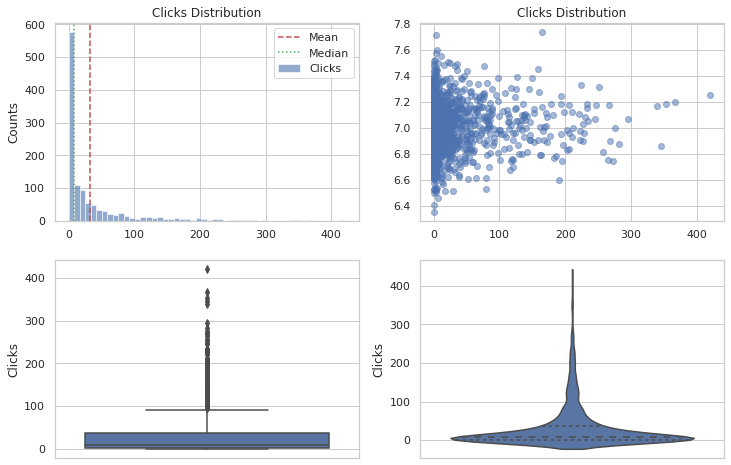

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['Clicks'].hist(bins=50, label='Clicks', alpha=0.6)
plt.axvline(np.mean(df['Clicks']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Clicks']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Clicks Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Clicks'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Clicks Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Clicks", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="Clicks", data=df, inner="quartile", bw=0.2)

In [ ]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"Z-показатель для {threshold} отклонений соответствует {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Отклонения в {(~good).sum()} случаев")
    return good

**Используем Z-оценку**

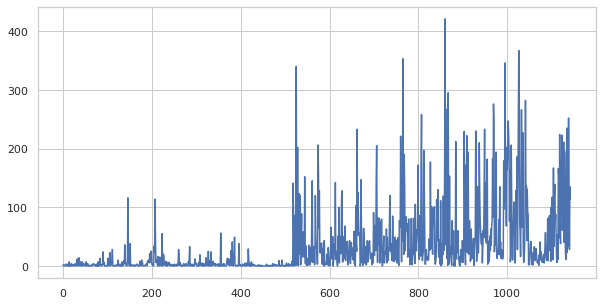

In [ ]:
df['Clicks'].plot(figsize=(10,5))

In [ ]:
print("Среднее значение по кликам: ", df["Clicks"].mean())
print("Стандартное отклонение по кликам: ", df["Clicks"].std())

Среднее значение по кликам:  33.39020122484689
Стандартное отклонение по кликам:  56.8924383035575


In [ ]:
z_score(df['Clicks'], threshold=2).sum()

Z-показатель для 2 отклонений соответствует 0.27%
Отклонения в 66 случаев


1077

Z-показатель для 2 отклонений соответствует 0.27%
Отклонения в 66 случаев
Z-показатель для 3 отклонений соответствует 0.27%
Отклонения в 33 случаев
Z-показатель для 4 отклонений соответствует 0.27%
Отклонения в 12 случаев
Z-показатель для 5 отклонений соответствует 0.27%
Отклонения в 5 случаев


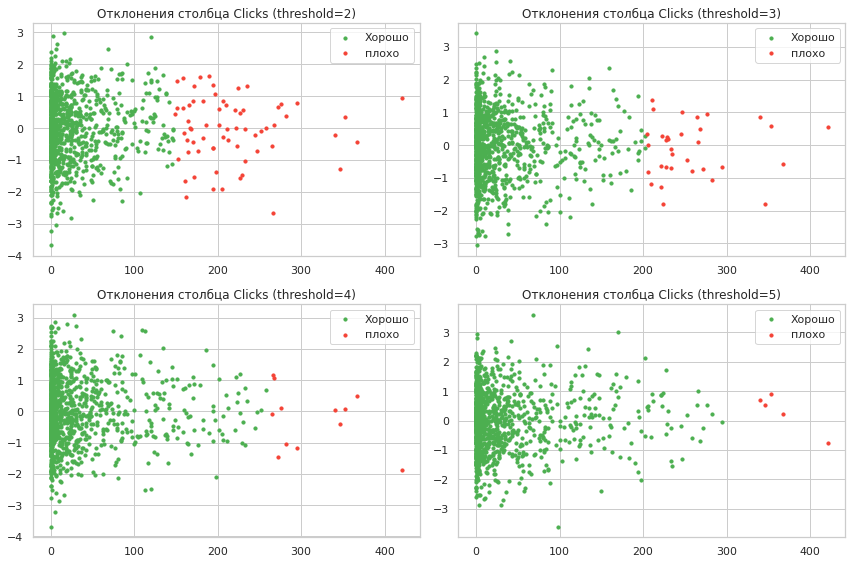

In [ ]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=df.shape[0])
    good = z_score(df['Clicks'], threshold=threshold)
    plt.scatter(df['Clicks'][good], visual_scatter[good], s=10, label="Хорошо", color="#4CAF50")
    plt.scatter(df['Clicks'][~good], visual_scatter[~good], s=10, label="плохо", color="#F44336")
    plt.legend()
    plt.title(f"Отклонения столбца Clicks (threshold={threshold})")

plt.tight_layout()

**Корреляция**

Построим таблицу и матрицу корреляции между числовыми признаками

In [ ]:
df_corr = df.drop(['ad_id', 'fb_campaign_id', ], axis=1)
df_corr.corr()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
interest,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


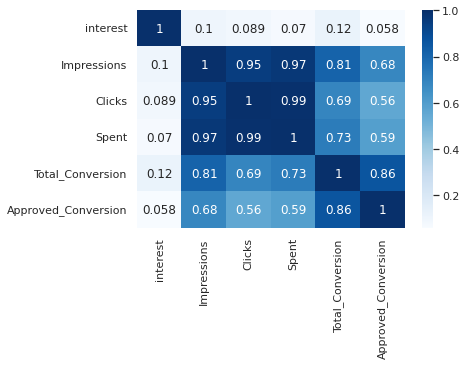

In [ ]:
sns.heatmap(df_corr.corr(), cmap="Blues", annot=True)
plt.show()

1. Признаки, сильно коррелирующие между собой:
  * impressions - Clicks - означает, что чем больше кликов от пользователей, тем больше показывается реклама;
  * Spent - Clicks, Spent - Impressions - чем больше компания XYZ заплатила Facebook денежных средств, тем больше произошло кликов и больше показов соответственно;
  * Total_Conversion - Approved_Conversion - те пользователи, кто интересовался рекламированным продуктом, впоследствии приобрели этот продукт в большинстве случаев.
2. Низкий уровень корреляции:
  * interest - *все переменные - например, при увеличении затрат по рекламе не обязателен рост интереса к рекламируемому продукту и не велика вероятность, соответственно, того, что продукт будет приобретен;

**Линейная регрессия**

**Прогнозируемая переменная**: общее количество людей, которые приобретут данный продукт (Approved_Conversion)

Используем библиотеку sklearn для алгоритма линейной регрессии

Но перед этим необходимо подготовить данные, нормализовать их

In [ ]:
scaler = MinMaxScaler()
df_regression = df.drop(['ad_id', 'fb_campaign_id', ], axis=1)

df_regression_x = scaler.fit_transform(df_regression.drop(['Approved_Conversion', 'age', 'gender', 'xyz_campaign_id'], axis=1))	

x = df_regression_x
y = df_regression['Approved_Conversion'].values.reshape(-1,1)

reg = LinearRegression().fit(x, y)
print(f"Свободный коэффициент (b0) лин регрессии равен: {reg.intercept_[0]}\nКоэффициенты: {reg.coef_[0]}")

predictions = reg.predict(x)
print(f"Среднеквадратичная ошибка: {mean_squared_error(y, predictions)}")

Свободный коэффициент (b0) лин регрессии равен: 0.10442623891779823
Коэффициенты: [-0.33615916  3.92808827 -2.8647134  -0.36801612 19.92761357]
Среднеквадратичная ошибка: 0.7406303264167121


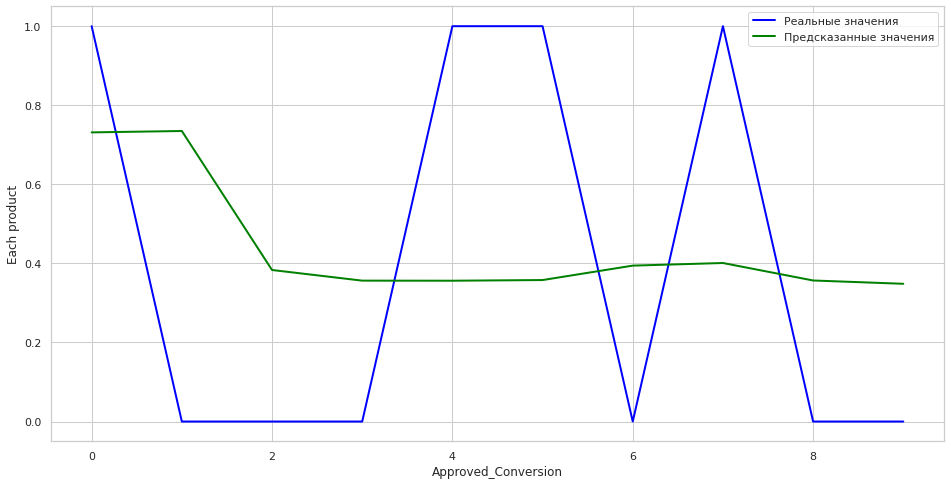

In [ ]:
predictions = reg.predict(x)
plt.figure(figsize=(16, 8))

plt.plot(
    list(range(0, 10)),
    df_regression[['Approved_Conversion']].head(10),
    c='blue',
    linewidth=2,
    label='Реальные значения'
)
plt.plot(
    list(range(0, 10)),
    predictions[0:10],
    c='green',
    linewidth=2,
    label='Предсказанные значения'
)
plt.xlabel("Approved_Conversion")
plt.ylabel("Each product")
plt.legend()
plt.show()

**Выводы**:
Найдены коэффициенты и свободный член линейной регрессии по 5 переменным. Вычислена среднеквадратическая ошибка регрессии.

**Выводы по работе**:

* выполнен первичный разведывательный анализ данных (EDA), сформулированы нулевые гипотезы, проведены параметрические и непараметрические тесты;

* визуализированы основные показатели по датасету;

* построена матрица корреляции, сделаны основные заключения по коррелирующим признакам;

* осуществлен прогноз переменной количества людей, которые приобретут рекламируемый продукт с помощью алгоритма линейной регрессии.